In [1]:
from numpy import array
from numpy import hstack
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel(r'C:\Users\vaibhav\Desktop\schneider\ContinuousMotion_Data_Horizontalsetup.xlsx')

In [3]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [4]:
# define input sequence
in_seq1 = df['Pow_100'].values
in_seq2 = df['Pow_200'].values
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

In [5]:
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2


In [6]:
# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# flatten output
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [8]:
# define model
model = Sequential()
model.add(Conv1D(64, 2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_output))
model.compile(optimizer='adam', loss='mse',metrics = ['accuracy'])
#fit model
model.fit(X_train, y_train, epochs=300, verbose=2)

Epoch 1/300
1055/1055 - 2s - loss: 0.0592 - accuracy: 0.5584 - 2s/epoch - 2ms/step
Epoch 2/300
1055/1055 - 1s - loss: 0.0079 - accuracy: 0.5397 - 1s/epoch - 1ms/step
Epoch 3/300
1055/1055 - 1s - loss: 0.0078 - accuracy: 0.5255 - 1s/epoch - 1ms/step
Epoch 4/300
1055/1055 - 1s - loss: 0.0077 - accuracy: 0.5312 - 1s/epoch - 1ms/step
Epoch 5/300
1055/1055 - 1s - loss: 0.0076 - accuracy: 0.5241 - 1s/epoch - 1ms/step
Epoch 6/300
1055/1055 - 1s - loss: 0.0077 - accuracy: 0.5237 - 1s/epoch - 1ms/step
Epoch 7/300
1055/1055 - 1s - loss: 0.0076 - accuracy: 0.5173 - 1s/epoch - 1ms/step
Epoch 8/300
1055/1055 - 1s - loss: 0.0076 - accuracy: 0.5196 - 1s/epoch - 1ms/step
Epoch 9/300
1055/1055 - 1s - loss: 0.0075 - accuracy: 0.5308 - 1s/epoch - 1ms/step
Epoch 10/300
1055/1055 - 1s - loss: 0.0074 - accuracy: 0.5243 - 1s/epoch - 1ms/step
Epoch 11/300
1055/1055 - 1s - loss: 0.0075 - accuracy: 0.5222 - 1s/epoch - 1ms/step
Epoch 12/300
1055/1055 - 1s - loss: 0.0074 - accuracy: 0.5226 - 1s/epoch - 1ms/step
E

In [11]:
# demonstrate prediction
#x_input = array([[60, 65, 125], [70, 75, 145], [80, 85, 165]])
datapoints= 100
predict_y = list()
for x in range(datapoints):
    x_input = X_test[x:x+1]
    x_input = x_input.reshape((1, 3, 3))
    yhat = model.predict(x_input, verbose=0)
    predict_y.append(yhat)
predict_y = np.array(predict_y).reshape(len(predict_y),6)  
# x_input = X_test
# x_input = x_input.reshape((1, n_steps_in, n_features))
# yhat = model.predict(x_input, verbose=2)
# print(yhat)

In [12]:
predict_y.shape

(100, 6)

# Stuck

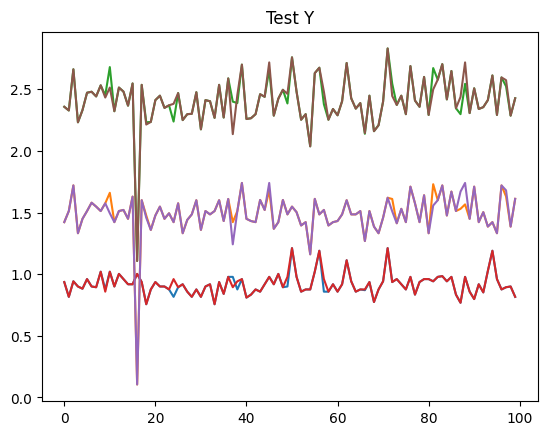

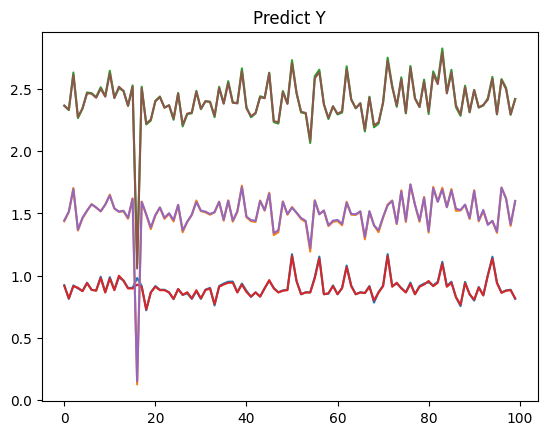

In [14]:
# default_x_ticks = range(len(y_test))
# plt.title('Actual values')
# plt.xlabel('Data points')
# plt.ylabel('Power consumption')
# plt.plot(default_x_ticks[0:datapoints],y_test[0:datapoints])
# #plt.xticks(default_x_ticks, x)
# plt.show()

# #predict
# default_x_ticks = range(len(predict_y))
# plt.title('Predicted values')
# plt.xlabel('Data points')
# plt.ylabel('Power consumption')
# plt.plot(default_x_ticks[0:datapoints],predict_y[0:datapoints])
# #plt.xticks(default_x_ticks, x)
# plt.show()

default_x_ticks = range(100)
plt.title('Test Y')
plt.plot(default_x_ticks[0:datapoints], y_test[0:datapoints])
plt.show()

default_x_ticks = range(len(predict_y))
plt.title('Predict Y')
plt.plot(default_x_ticks[0:datapoints], predict_y[0:datapoints])
plt.show()

In [15]:
print(X_test.shape,y_test.shape,  )

(11249, 3, 3) (11249, 6)


In [16]:
y_test100 = y_test[:,0]
y_test100

array([0.93599999, 0.81600004, 0.94199997, ..., 1.16199994, 0.75600004,
       0.93599999])

In [17]:
y_test

array([[0.93599999, 1.42199993, 2.35799992, 0.93599999, 1.42199993,
        2.35799992],
       [0.81600004, 1.51199996, 2.32800001, 0.81600004, 1.51199996,
        2.32800001],
       [0.94199997, 1.71999991, 2.66199988, 0.94199997, 1.71999991,
        2.66199988],
       ...,
       [1.16199994, 1.44900012, 2.61100006, 1.21799994, 1.44900012,
        2.66700006],
       [0.75600004, 1.51199996, 2.26800001, 0.75600004, 1.51199996,
        2.26800001],
       [0.93599999, 1.42199993, 2.35799992, 0.93599999, 1.42199993,
        2.35799992]])

# SCRATCH

In [18]:
X, y = split_sequences(dataset, n_steps_in, n_steps_out)

In [19]:
y[0]

array([[0.28599998, 1.34100008, 1.62700006],
       [0.85799998, 1.49000001, 2.34799999]])

In [20]:
y.shape

(44996, 2, 3)

In [21]:
X

array([[[0.20999999, 1.55700004, 1.76700003],
        [0.20999999, 1.55700004, 1.76700003],
        [0.28599998, 1.34100008, 1.62700006]],

       [[0.20999999, 1.55700004, 1.76700003],
        [0.28599998, 1.34100008, 1.62700006],
        [0.28599998, 1.34100008, 1.62700006]],

       [[0.28599998, 1.34100008, 1.62700006],
        [0.28599998, 1.34100008, 1.62700006],
        [0.85799998, 1.49000001, 2.34799999]],

       ...,

       [[0.90000004, 1.54799998, 2.44800001],
        [0.90000004, 1.54799998, 2.44800001],
        [0.90000004, 1.54799998, 2.44800001]],

       [[0.90000004, 1.54799998, 2.44800001],
        [0.90000004, 1.54799998, 2.44800001],
        [0.90000004, 1.54799998, 2.44800001]],

       [[0.90000004, 1.54799998, 2.44800001],
        [0.90000004, 1.54799998, 2.44800001],
        [0.90000004, 1.54799998, 2.44800001]]])

In [22]:
X_test.shape

(11249, 3, 3)

In [23]:
out_seq

array([[1.76700003],
       [1.76700003],
       [1.62700006],
       ...,
       [2.44800001],
       [2.44800001],
       [2.44800001]])

In [24]:
x_input.shape

(1, 3, 3)

In [25]:
X_test.shape

(11249, 3, 3)

In [26]:
y_test[0:100]

array([[0.93599999, 1.42199993, 2.35799992, 0.93599999, 1.42199993,
        2.35799992],
       [0.81600004, 1.51199996, 2.32800001, 0.81600004, 1.51199996,
        2.32800001],
       [0.94199997, 1.71999991, 2.66199988, 0.94199997, 1.71999991,
        2.66199988],
       [0.90000004, 1.33200002, 2.23200005, 0.90000004, 1.33200002,
        2.23200005],
       [0.88199997, 1.44900012, 2.33100009, 0.88199997, 1.44900012,
        2.33100009],
       [0.95999998, 1.51199996, 2.47199994, 0.95999998, 1.51199996,
        2.47199994],
       [0.90000004, 1.57999992, 2.47999996, 0.90000004, 1.57999992,
        2.47999996],
       [0.89400005, 1.54799998, 2.44200003, 0.89400005, 1.54799998,
        2.44200003],
       [1.01999998, 1.51199997, 2.53199995, 1.01999998, 1.51199997,
        2.53199995],
       [0.87599999, 1.57500005, 2.45100003, 0.85799998, 1.57500005,
        2.43300003],
       [1.01999998, 1.65999997, 2.67999995, 1.01999998, 1.49400008,
        2.51400006],
       [0.90000004, 1